In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import geopandas as gpd

In [48]:
from plotnine import *
from plotnine.animation import PlotnineAnimation
from IPython.display import HTML
import plotnine as pn
import imageio

# IT ACT 2003-2010 Arrests

In [49]:
state_wise_it_act_arrests = pd.DataFrame()

for file in os.listdir('state_wise_it_act_arrests'):
    cols = ['below 18 years','between 18 - 30 years', 'between 30 - 45 years','between 45 - 60 years', 'above 60 years', 'total']
    if file.split('.')[-1] != 'csv':continue
    yr = file.replace('-', '_').split('_')[1]
    df = pd.read_csv(f'state_wise_it_act_arrests/{file}')
    df.columns = df.columns.str.lower().str.replace('–', '-')
    yr_df = df[df['category'] == 'Total (All-India)'].loc[:, cols].reset_index(drop=True)
    yr_df['year'] = int(yr)
    state_wise_it_act_arrests = pd.concat([state_wise_it_act_arrests, yr_df])
    state_wise_it_act_arrests = state_wise_it_act_arrests.sort_values('year').reset_index(drop=True)
    
    
state_wise_it_act_arrests

,below 18 years,between 18 - 30 years,between 30 - 45 years,between 45 - 60 years,above 60 years,total,year
0,4.0,31.0,13.0,7.0,0.0,55.0,2003
1,2.0,37.0,18.0,3.0,0.0,60.0,2004
2,1.0,131.0,53.0,6.0,1.0,192.0,2005
3,2.0,109.0,39.0,3.0,1.0,154.0,2006
4,2.0,97.0,46.0,9.0,0.0,154.0,2007
5,4.0,109.0,57.0,7.0,1.0,178.0,2008
6,10.0,186.0,83.0,8.0,1.0,288.0,2009
7,16.0,433.0,298.0,45.0,7.0,799.0,2010


In [50]:
lis = []
# os.mkdir('seq')
for i in range(len(state_wise_it_act_arrests)):
    frame = ggplot(state_wise_it_act_arrests.iloc[:i+1]) + geom_line(aes(x='year', y='total')) + geom_point(aes(x='year', y='total'))
    frame += pn.labs(x='Year', y='Total Arrests', title='Arrests under IT act 2000 per year')
    frame += pn.themes.theme(figure_size=(6, 4))
    frame += pn.theme_minimal()
    frame += pn.theme(plot_title=pn.themes.element_text(hjust=0.5))
#     frame += pn.lims(x=(2003, 2011),y=(0, 1000))
    frame += pn.scale_x_continuous(breaks=list(range(2003, 2011)))
    lis.append(frame)
    frame.save(f'seq/img_{i}.jpeg', dpi=300)
    
image_files = sorted(os.listdir('seq'))  # Assuming the images are saved in the current directory
image_files = [image for image in image_files if image.endswith('.jpeg')]

images = []
for image_file in image_files:
    images.append(imageio.imread(f'seq/{image_file}'))

# Save the images as a GIF
# os.remove('lineplot.gif')
imageio.mimsave('lineplot.gif', images, fps=2)  # Adjust duration as needed

/Users/adityagupta/pytorch-test/env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/adityagupta/pytorch-test/env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: seq/img_0.jpeg
/Users/adityagupta/pytorch-test/env/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:111: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
/Users/adityagupta/pytorch-test/env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/adityagupta/pytorch-test/env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: seq/img_1.jpeg
/Users/adityagupta/pytorch-test/env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/adityagupta/pytorch-test/env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: seq/img_2.jpeg
/U

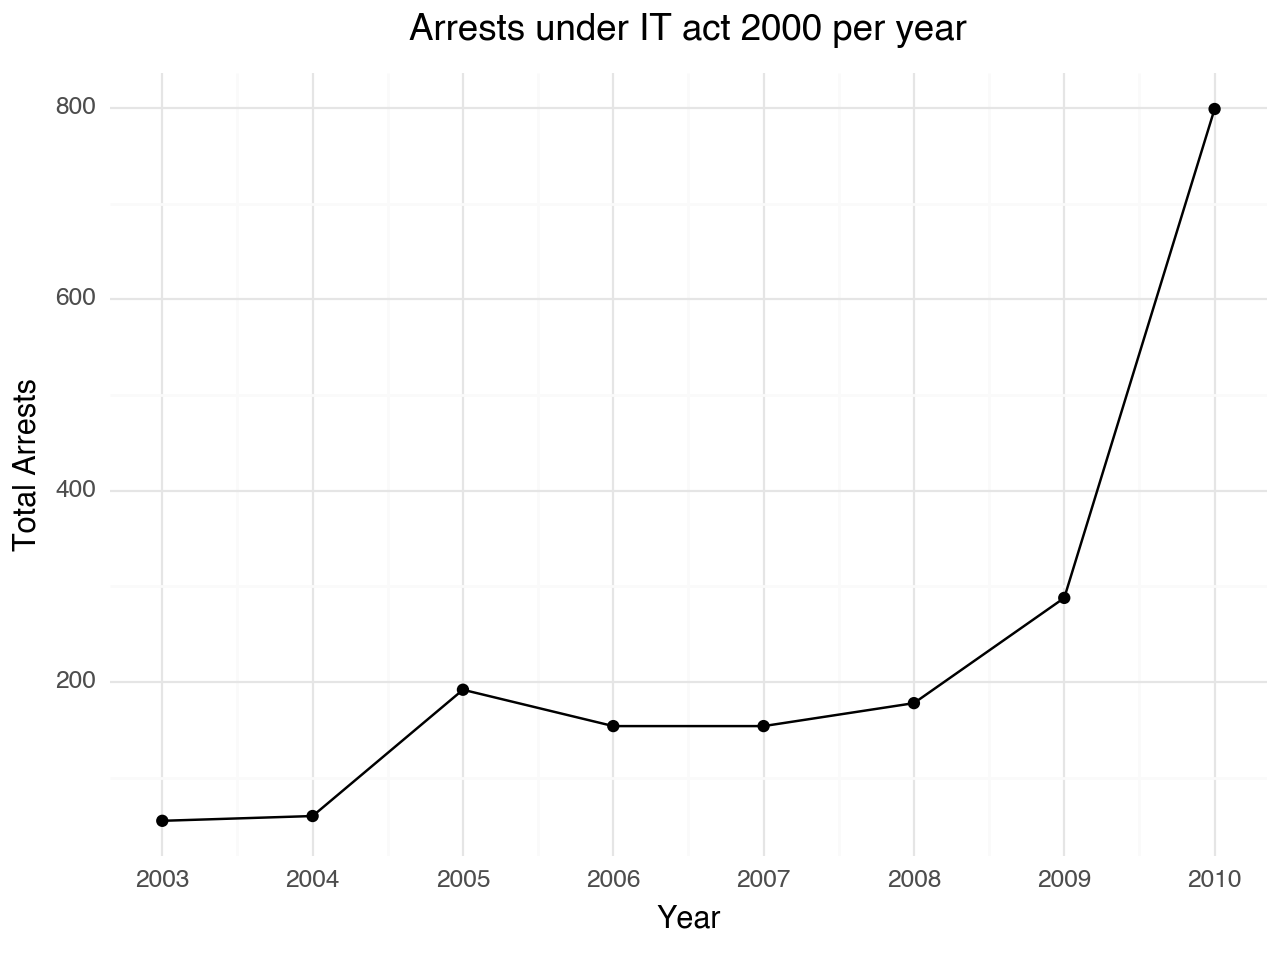

<Figure Size: (640 x 480)>

In [51]:
lis[-1]

# Motives breakdown of 2020

In [52]:
cyber_crime_columns_combine = {
    'Harassment' : ['Personal Revenge - (Col. 3)', 'Anger - (Col. 4)', 'Prank - (Col. 8)', 'Abetment to Suicide - (Col. 22)'],
    'Fraud' : ['Fraud - (Col. 5)', 'Steal Information - (Col. 21)'], 
    'Extortion' : ['Extortion - (Col. 6)'],
    'Sexual Exploitation' : ['Sexual Exploitation - (Col. 9)'],
    'Political Motives' : ['Political Motives - (Col. 10)'],
    'Terrorist Activities' : ['Terrorist Activities - Terrorist Activities (Total) - (Col. 11)', 'Terrorist Activities - Terrorist Recruitment - (Col. 12)', 'Terrorist Activities - Terrorist Funding - (Col. 13)', 'Terrorist Activities - Others - (Col. 14)'],
    'Hate Crime' : ['Inciting Hate against Country - (Col. 15)'],
    'Other' : ['Disrupt Public Service - (Col. 16)', 'Sale Purchase illegal drugs - (Col. 17)', 'Spreading Piracy - (Col. 19)', 'Developing own business - (Col. 18)', 'Psycho or Pervert - (Col. 20)', 'Others - (Col. 23)'],
    'Total' : ['Total - (Col. 24)']
}

def get_cyber_crime_motives(path):
    df = pd.read_csv(path)
#     return df
    for col in cyber_crime_columns_combine:
        df[col] = 0
        for cl in cyber_crime_columns_combine[col]:
            df[col] += df[cl]

    df = df[['State/UT (Col. 2)'] + list(cyber_crime_columns_combine.keys())]
    df = df[~df['State/UT (Col. 2)'].str.contains('Total', case=False)].reset_index(drop=True)
    df = df.rename(columns={'State/UT (Col. 2)' : 'State/UT'})

    return df

cc_motive = get_cyber_crime_motives('cyber_crime_motives/NCRB_CII-2020_Table.No-9A.3.csv')
cc_categ = pd.DataFrame({'Category' : list(cc_motive.sum()[1:-1].keys()), 'Value' : cc_motive.sum()[1:-1]}).reset_index(drop=True)
cc_categ.to_csv('r_pie_data.csv', index=False)

# This CSV is further used to create pie chart in R as plotnine doesnt support pie chart


In [54]:
# cc_motive

# Court Disposal - Pendency, Conviction, Cases -- Metro cities

In [71]:
cc_court_metro = pd.DataFrame()
for file in os.listdir('cc_wise_court_disposal_metro'):
    if file.split('.')[-1] != 'csv':continue
    spl = file.replace('.', ' ').replace('-', ' ').replace('_', ' ').split(' ')
    yr = 0
    for s in spl:
        try:
            if int(s) > 2000:yr = s
        except:
            pass
    df = pd.read_csv(f'cc_wise_court_disposal_metro/{file}')
    sent_idx = np.argmax(df.columns.str.contains('Sent'))
    total_idx = np.argmax(df.columns.str.contains('Total'))
    
    cc_court_metro = pd.concat([cc_court_metro, pd.DataFrame({'Year' : [yr], 'Pendency Rate' : [df.iloc[-1,-1]], 'Conviction Rate' : [df.iloc[-1,-2]], 'New Cases' : [df.iloc[-1, sent_idx]], 'Total Cases' : [df.iloc[-1, total_idx]]})])
    

cc_court_metro = cc_court_metro.sort_values('Year').reset_index(drop=True)
cc_court_metro['Year'] = cc_court_metro['Year'].astype(int)
cc_court_metro['Pendency Rate'] = cc_court_metro['Pendency Rate'].astype(float)
cc_court_metro['Conviction Rate'] = cc_court_metro['Conviction Rate'].astype(float)
cc_court_metro

,Year,Pendency Rate,Conviction Rate,New Cases,Total Cases
0,2016,95.7,18.9,813,2214
1,2017,96.1,12.5,1045,3066
2,2018,94.8,20.2,1446,4399
3,2019,92.7,17.2,1878,6003
4,2020,72.5,28.8,4151,9844
5,2021,62.7,52.3,8482,15751


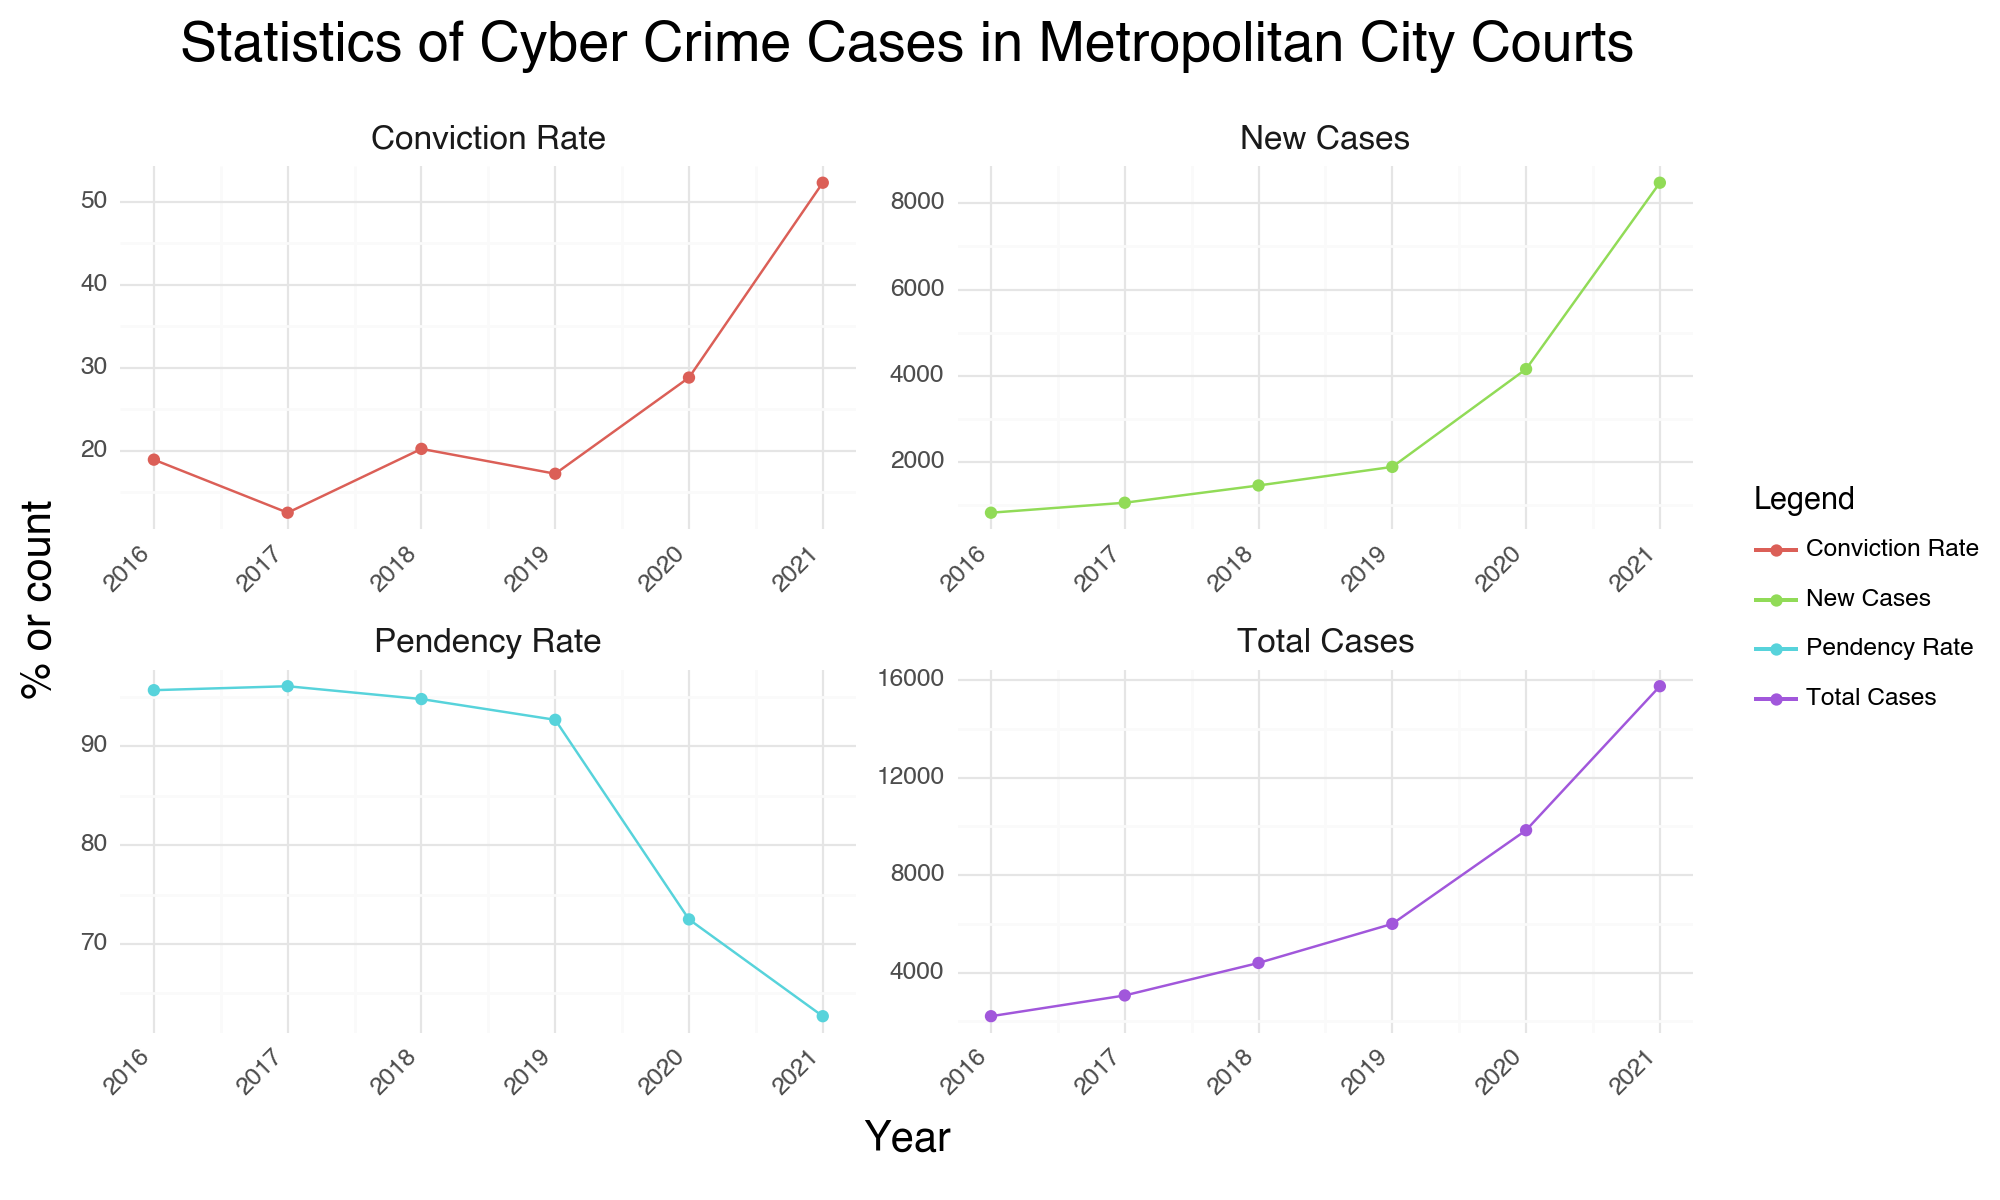

<Figure Size: (1000 x 600)>

In [97]:
cc_court_metro_melt = pd.melt(cc_court_metro, id_vars='Year', var_name='Legend', value_name='num')
(
    ggplot(cc_court_metro_melt, aes(x='Year', y='num', color='Legend'))
    + pn.geom_line()
    + pn.geom_point()
    + pn.facet_wrap('~ Legend', scales='free')
    + pn.theme_minimal()
    + pn.labs(x='Year', y='% or count', title='Statistics of Cyber Crime Cases in Metropolitan City Courts')
    + pn.theme(figure_size=(10,6), axis_text_x=pn.element_text(rotation=45, hjust=1), strip_text=pn.element_text(size=12, weight='bold'), axis_title=pn.element_text(size=15, weight='bold'), plot_title=element_text(weight='bold' ,hjust=0.5, size=20))
)

# Metro vs country avg

In [105]:
cc_court_all = pd.DataFrame()
for file in os.listdir('cc_wise_court_disposal_state'):
    if file.split('.')[-1] != 'csv':continue
    spl = file.replace('.', ' ').replace('-', ' ').replace('_', ' ').split(' ')
    yr = 0
    for s in spl:
        try:
            if int(s) > 2000:yr = s
        except:
            pass
    df = pd.read_csv(f'cc_wise_court_disposal_state/{file}')
    sent_idx = np.argmax(df.columns.str.contains('Sent'))
    total_idx = np.argmax(df.columns.str.contains('Total'))
    cc_court_all = pd.concat([cc_court_all, pd.DataFrame({'Year' : [yr], 'Pendency Rate' : [df.iloc[-1,-1]], 'Conviction Rate' : [df.iloc[-1,-2]], 'New Cases' : [df.iloc[-1, sent_idx]], 'Total Cases' : [df.iloc[-1, total_idx]]})])
    

cc_court_all = cc_court_all.sort_values('Year').reset_index(drop=True)
cc_court_all['Year'] = cc_court_all['Year'].astype(int)
cc_court_all

,Year,Pendency Rate,Conviction Rate,New Cases,Total Cases
0,2017,94.6,22.6,5180,13941
1,2018,93.3,47.4,7234,20320
2,2019,94.9,35.5,9269,27826
3,2020,89.1,68.3,14176,40656


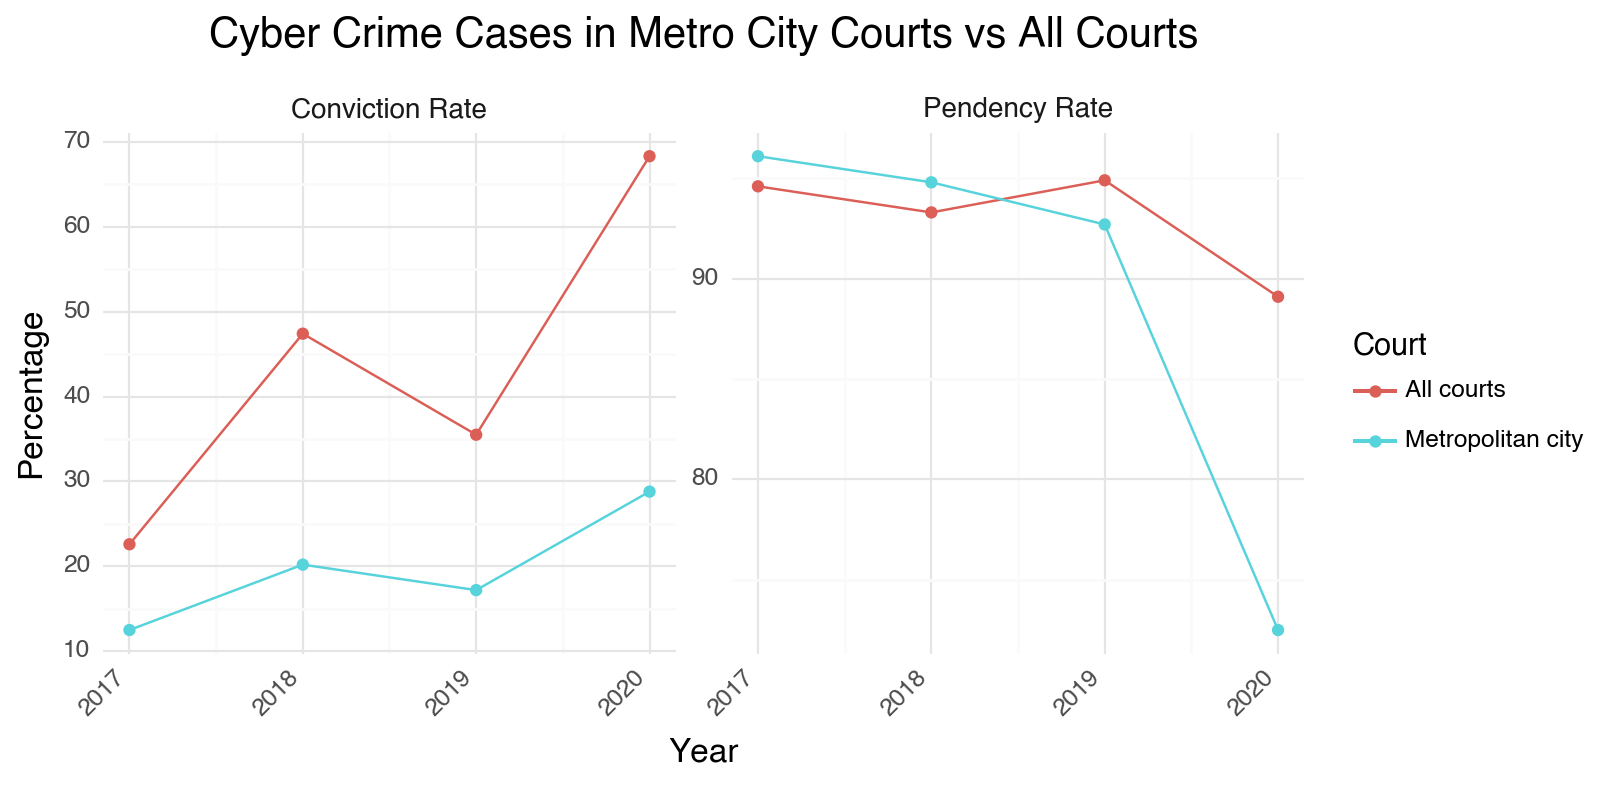

<Figure Size: (800 x 400)>

In [131]:
cc_court_all_melt = pd.melt(cc_court_all, id_vars='Year', var_name='Legend', value_name='num')
cc_court_metro_melt['Court'] = "Metropolitan city"
cc_court_metro_melt = cc_court_metro_melt[(cc_court_metro_melt['Year'] != 2016) & (cc_court_metro_melt['Year'] != 2021)].reset_index(drop=True)
cc_court_all_melt['Court'] = "All courts"
cc_court_combined = pd.concat([cc_court_all_melt, cc_court_metro_melt])
cc_court_combined = cc_court_combined[~cc_court_combined['Legend'].str.contains('Cases')]

(
    ggplot(cc_court_combined, aes(x='Year', y='num', color='Court', group='Court'))
    + pn.geom_line()
    + pn.geom_point()
    + pn.facet_wrap('~ Legend', scales='free')
    + pn.theme_minimal()
    + pn.labs(x='Year', y='Percentage', title='Cyber Crime Cases in Metro City Courts vs All Courts')
    + pn.theme(figure_size=(8,4), axis_text_x=pn.element_text(rotation=45, hjust=1), strip_text=pn.element_text(size=10, weight='bold'), axis_title=pn.element_text(size=12, weight='bold'), plot_title=element_text(weight='bold' ,hjust=0.5, size=15))
)